In [1]:
### 1 Support Vector Machines ###
"""
We will be using support vector machines (SVMs) with various example 2D datasets.
"""
import scipy.io # load .mat files
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np

In [2]:
### 1.1 Example Dataset 1 ###
"""
We will begin by with a 2D example dataset which can be separated by a linear boundary.
"""
# take a look 
file_location = 'ex6/ex6data1'
data = scipy.io.loadmat(file_location)
X,y = data['X'],data['y']
print(X[:5])
print(y[:5])

[[1.9643 4.5957]
 [2.2753 3.8589]
 [2.9781 4.5651]
 [2.932  3.5519]
 [3.5772 2.856 ]]
[[1]
 [1]
 [1]
 [1]
 [1]]


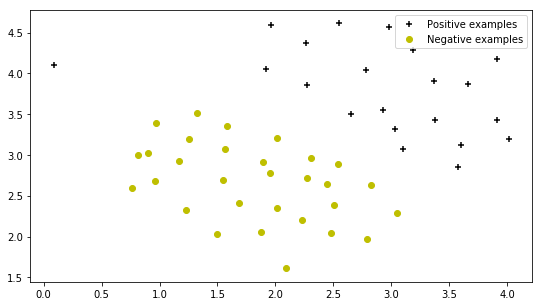

In [3]:
# visualize data 
pos = (y==1).flatten() # flatten return a copy of the array collapsed into one dimension
neg = (y==0).flatten()

def plotData():
    plt.figure(figsize=(9,5))
    plt.scatter(X[pos,0], X[pos,1], c='k', marker='+', label='Positive examples')
    plt.scatter(X[neg,0], X[neg,1], c='y', marker='o', label='Negative examples')
    plt.legend(loc='best') # choose the best location automatically

plotData()
plt.show()

In [4]:
def fit_and_plot(c,kernel,gamma):
    """
    fit model and plot desicion boundary 
    """
    model = svm.SVC(C=c, kernel=kernel,gamma=gamma)
    model.fit(X,y.flatten()) # flatten return a copy of the array collapsed into one dimension
    
    # make the grid for contour 
    h, n = 0.1, 100
    xmin, xmax = X[:,0].min()-h, X[:,0].max()+h
    ymin, ymax = X[:,1].min()-h, X[:,1].max()+h
    xx = np.linspace(xmin,xmax,n)
    yy = np.linspace(ymin,ymax,n)
    XX, YY = np.meshgrid(xx,yy) # make the grid for contour 
    ZZ = np.zeros(XX.shape)
    
    for i,xi in enumerate(xx):
        for j,yj in enumerate(yy):
            ZZ[i,j] = model.predict(np.array([[xi,yj]]))
    
    
    ZZ = ZZ.transpose() # very important step since using the method 'meshgrid' equals to transpose the original matrix  
    plt.contour(XX, YY, ZZ, colors='r')


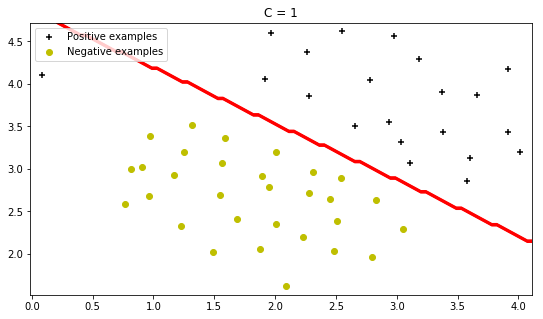

Model tends to overfit if C is large. (we can seen C as 1/λ)


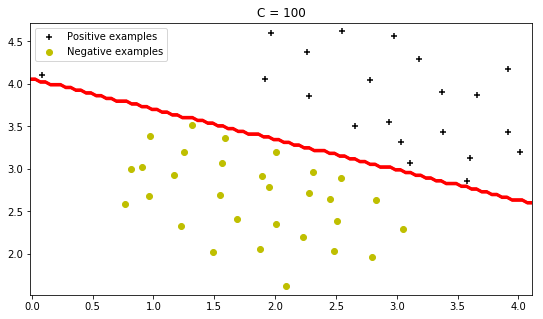

In [5]:
# plot and see the difference when c=1,100 
plotData()
fit_and_plot(1,'linear','auto')
plt.title('C = 1')
plt.show()

print('Model tends to overfit if C is large. (we can seen C as 1/λ)')

plotData()
fit_and_plot(100,'linear','auto')
plt.title('C = 100')
plt.show()

In [6]:
### 1.2 SVM with Gaussian Kernels ###
# We will be using SVMs to do non-linear classification. 
# In particular, we will be using SVMs with Gaussian kernels on datasets that are not linearly separable.

In [7]:
### 1.2.1 Gaussian Kernel ###
# To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. 
# We can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples.
def gaussianKernel(x1,x2,sigma):
    return np.exp(-np.dot((x1-x2).T,(x1-x2))/(2*sigma**2))
                
sim = gaussianKernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 2.)
print('This value should be about 0.324652\n',sim)

This value should be about 0.324652
 0.32465246735834974


In [8]:
### 1.2.2 Example Dataset 2 ###
file_location = 'ex6/ex6data2'
data = scipy.io.loadmat(file_location)
X,y = data['X'],data['y']
print(X[:5])
print(y[:5])

[[0.107143  0.60307  ]
 [0.093318  0.649854 ]
 [0.0979263 0.705409 ]
 [0.15553   0.784357 ]
 [0.210829  0.866228 ]]
[[1]
 [1]
 [1]
 [1]
 [1]]


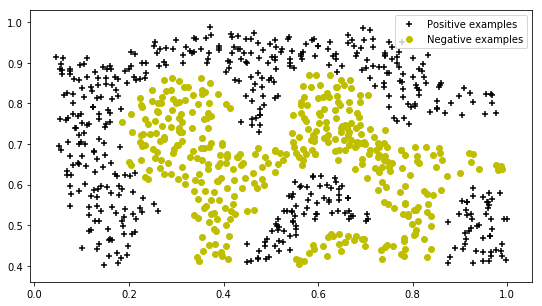

In [9]:
pos = (y==1).flatten() # flatten return a copy of the array collapsed into one dimension
neg = (y==0).flatten()

plotData()
plt.show()

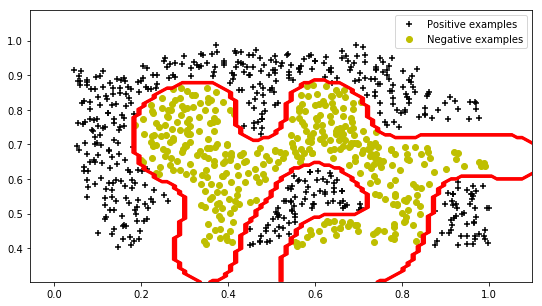

In [10]:
# non-linear desicion boundary 
sigma = 0.1
gamma = np.power(sigma,-2.) # apply 'rbf' and 1/sigmma**2 eguals to gaussian kernel in python
plotData()
fit_and_plot(1,'rbf',gamma) 
plt.show()

In [11]:
### 1.2.3 Example Dataset 3 ###
file_location = 'ex6/ex6data3'
data = scipy.io.loadmat(file_location)
X,y = data['X'],data['y']
Xval, yval = data['Xval'], data['yval']
print(X[:5])
print(y[:5])

[[-0.158986  0.423977]
 [-0.347926  0.47076 ]
 [-0.504608  0.353801]
 [-0.596774  0.114035]
 [-0.518433 -0.172515]]
[[1]
 [1]
 [1]
 [1]
 [1]]


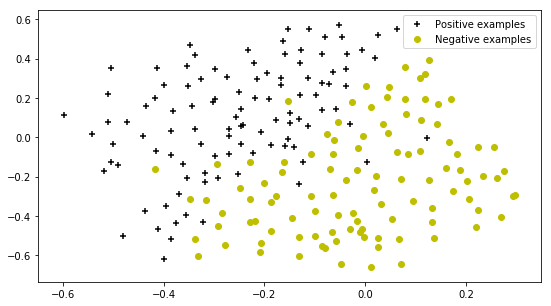

In [12]:
pos = (y==1).flatten() # flatten return a copy of the array collapsed into one dimension
neg = (y==0).flatten()

plotData()
plt.show()

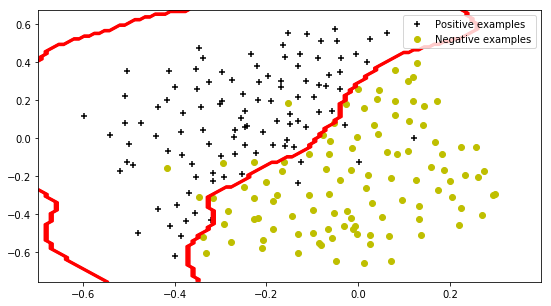

In [13]:
# choose the best C and sigma
ls = [0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.]
best, best_score = (0,0), 0
for c in ls:
    for sigma in ls:
        gamma = np.power(sigma,-2.)
        model = svm.SVC(C=c, kernel='rbf',gamma=gamma)
        model.fit(X,y.flatten()) # flatten return a copy of the array collapsed into one dimension
        _score = model.score(Xval,yval)
        if _score > best_score:
            best_score = _score
            best = (c,sigma)
            
gamma = np.power(best[1],-2.)
plotData()
fit_and_plot(best[0],'rbf',gamma)
plt.show()

In [ ]:
### 2 Spam Classification ###